
# Requesting cutouts of AIA images from the JSOC

This example shows how to request a cutout of a series of
AIA images from the JSOC.


In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch

import sunpy.coordinates  # NOQA
import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

As this is an example, we have already worked out where
we need to crop for the active region we want to showcase.



In [ ]:
start_time = Time('2011-01-20T09:15:44', scale='utc', format='isot')
bottom_left = SkyCoord(-500*u.arcsec, -275*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")
top_right = SkyCoord(150*u.arcsec, 375*u.arcsec, obstime=start_time, observer="earth", frame="helioprojective")

# Now construct the cutout from the coordinates aboveabove using the `~sunpy.net.jsoc.attrs.Cutout` attribute.
cutout = a.jsoc.Cutout(bottom_left, top_right=top_right, tracking=True)

Now we are ready to construct the query. Note that all of this is
the same for a full-frame image except for the
cutout component. We will download images from a 12 hour interval
centered on the time of the above cutout.
We request one image every 2 hours.



In [ ]:
jsoc_email = "carlos.colladocapell@epfl.ch"

query = Fido.search(
    a.Time(start_time - 1*u.h, start_time + 1*u.h),
    a.Wavelength(304*u.angstrom),
    a.Sample(2*u.h),
    a.jsoc.Series.aia_lev1_euv_12s,
    a.jsoc.Notify(jsoc_email),
    a.jsoc.Segment.image,
    #cutout,
)
print(query)

Results from 1 Provider:

2 Results from the JSOCClient:
Source: http://jsoc.stanford.edu

       T_REC         TELESCOP INSTRUME WAVELNTH CAR_ROT
-------------------- -------- -------- -------- -------
2011-01-20T08:15:38Z  SDO/AIA    AIA_4      304    2105
2011-01-20T10:15:38Z  SDO/AIA    AIA_4      304    2106




Submit the export request and download the data.



In [ ]:
files = Fido.fetch(query)
files.sort()

Export request pending. [id=JSOC_20231112_1462, status=2]
Waiting for 0 seconds...
Export request pending. [id=JSOC_20231112_1462, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231112_1462, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231112_1462, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231112_1462, status=1]
Waiting for 5 seconds...
Export request pending. [id=JSOC_20231112_1462, status=1]
Waiting for 5 seconds...
2 URLs found for download. Full request totalling 19MB


Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

Now that we've downloaded the files, we can create
a `~sunpy.map.MapSequence` from them and animate
them.



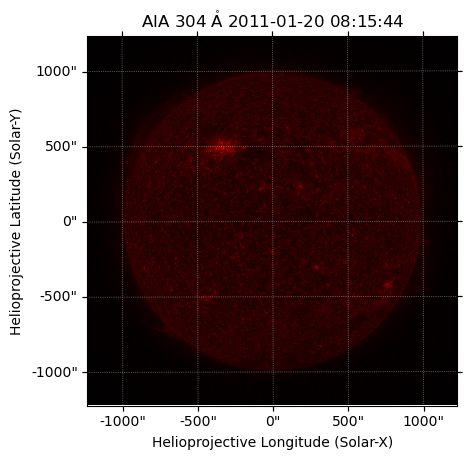

In [ ]:
sequence = sunpy.map.Map(files, sequence=True)

fig = plt.figure()
ax = fig.add_subplot(projection=sequence.maps[0])
ani = sequence.plot(axes=ax, norm=ImageNormalize(vmin=0, vmax=5e3, stretch=SqrtStretch()))

plt.show()

In [ ]:
import numpy as np
smap = sunpy.map.Map(files[0])
figure = plt.figure(frameon=False)
ax = plt.axes([0, 0, 1, 1])
# Disable the axis
ax.set_axis_off()

# Plot the map.
# Since we are not interested in the exact map coordinates,
# we can simply use :meth:`~matplotlib.Axes.imshow`.
norm = smap.plot_settings['norm']
norm.vmin, norm.vmax = np.percentile(smap.data, [1, 99.9])
ax.imshow(smap.data,
          norm=norm,
          cmap=smap.plot_settings['cmap'],
          origin="lower")

In [ ]:
print(sequence.maps[0])

SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 4
Detector:		 AIA
Measurement:		 304.0 Angstrom
Wavelength:		 304.0 Angstrom
Observation Date:	 2011-01-20 08:15:44
Exposure Time:		 2.902184 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.60016501 0.60016501] arcsec / pix
Reference Pixel:	 [2053.22998 2037.20996] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[-1,  0,  1, ...,  0, -1,  0],
       [-1,  1,  0, ...,  0,  0,  0],
       [ 0,  0, -1, ..., -1,  1,  2],
       ...,
       [ 1,  0,  1, ..., -2, -2,  1],
       [ 0,  0,  0, ...,  1, -1, -1],
       [ 0, -1,  1, ...,  1, -2,  1]], dtype=int16)
